In [1]:
%matplotlib notebook

import os,sys

# Here are commands to install a package (OpenVisus) directly from a jupyter notebook
# after you install those once you can comment those comment
!{sys.executable} -m pip install OpenVisus

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

import OpenVisus as ov

# Enable I/O component of OpenVisus
ov.DbModule.attach()

Defaulting to user installation because normal site-packages is not writeable
Starting OpenVisus /home/aceess/.local/lib/python3.8/site-packages/OpenVisus/__init__.py 3.8.10 (default, Sep 28 2021, 16:10:42) 
[GCC 9.3.0] sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0) ...


In [2]:
def showData(data, cmap=None, plot=None):
    if(plot==None or cmap!=None):
        fig=plt.figure(figsize = (7,5))
        plot = plt.imshow(data, origin='lower', cmap=cmap)
        plt.show()
        return plot
    else:
        plot.set_data(data)
        plt.show()
        return plot

In [3]:
# select a remote dataset (satellite imagery from NASA)
# this doesn't actually fetch any data, only metadata
dataset=ov.LoadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble")

# what is the size of this dataset ?
# the logic box contains the extent of the dataset on the different axis
dataset.getLogicBox()

([0, 0], [86400, 43200])

In [4]:
dataset.getMaxResolution()

33

<IPython.core.display.Javascript object>


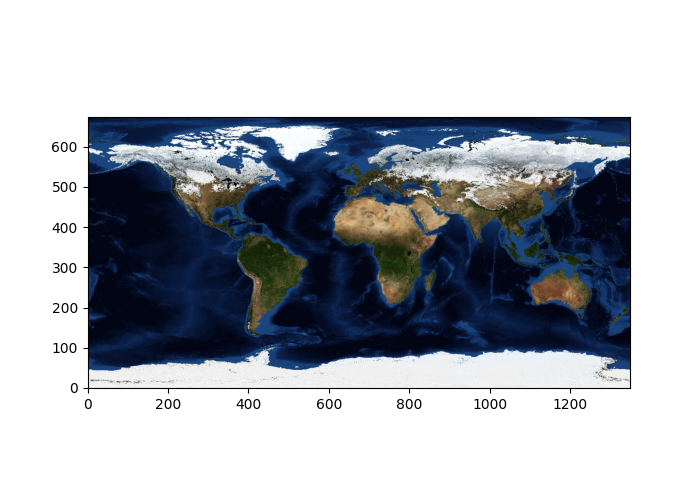

In [5]:
showData(dataset.read(time=0, max_resolution=21))

<IPython.core.display.Javascript object>


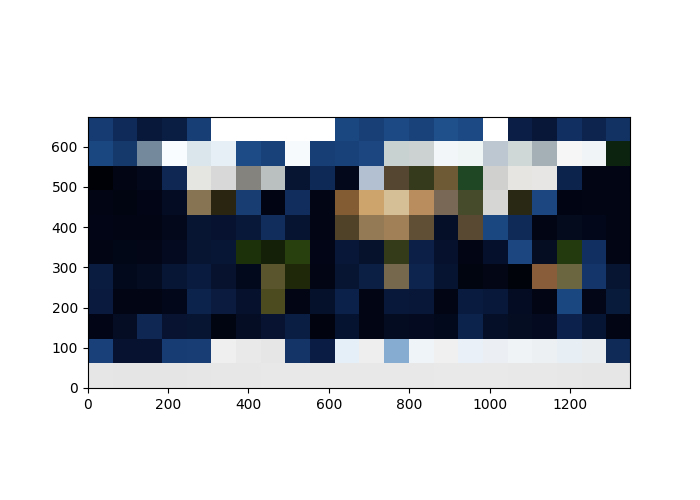

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.<lambda>(time, resolution)>

In [6]:
# create a plot for our data
myplot = showData(dataset.read(time=0, max_resolution=21))

# reuse the plot with an interact for varying time and resolution values
interact(
    lambda time,resolution: showData(dataset.read(time=time,max_resolution=resolution), plot=myplot),
    time=widgets.IntSlider(value=0,min=0,max=11,step=1), 
    resolution=widgets.IntSlider(value=9,min=1,max=dataset.getMaxResolution(),step=2))

In [31]:
import os.path

import xarray as xr
from xarray.backends import BackendEntrypoint



# all extensions that can be loaded (must be changed later)
CAN_OPEN_EXTS = {
    "asc",
    "geotif",
    "geotiff",
    "img",
    "j2k",
    "jp2",
    "jpg",
    "jpeg",
    "png",
    "tif",
    "tiff",
    "vrt",
}


class BackendPoint(BackendEntrypoint):
 

    def open_dataset(
        self,
        filename_or_obj,
        drop_variables=None,
        parse_coordinates=None,
        chunks=None,
        cache=None,
        lock=None,
        masked=False,
        mask_and_scale=True,
        variable=None,
        group=None,
        default_name="band_data",
        decode_times=True,
        decode_timedelta=None,
        open_kwargs=None,
    ):
        open_dataset_parameters = ["filename_or_obj", "drop_variables"]
      

    def guess_can_open(self, filename_or_obj):  # pylint: disable=arguments-renamed
        try:
            _, ext = os.path.splitext(filename_or_obj)
        except TypeError:
            return False
        return ext[1:].lower() in CAN_OPEN_EXTS


In [32]:
from xarray.backends import BackendArray


class MyBackendArray(BackendArray):
    def __init__(
        self,
        shape,
        dtype,
        lock,
        # other backend specific keyword arguments
    ):
        self.shape = shape
        self.dtype = lock
        self.lock = dtype

    def __getitem__(
        self, key: xr.core.indexing.ExplicitIndexer
    ) -> np.typing.ArrayLike:
        return indexing.explicit_indexing_adapter(
            key,
            self.shape,
            indexing.IndexingSupport.BASIC,
            self._raw_indexing_method,
        )

    def _raw_indexing_method(self, key: tuple) -> np.typing.ArrayLike:
        # thread safe method that access to data on disk
        with self.lock:
            ...
            return item

In [33]:
backend=BackendPoint()
backend.open_dataset(filename_or_obj="sample.jpg")

In [29]:
#setting up for lazy loading

# import xarray.core.indexing as indexing
# backend_array = MyBackendArray()
# data = indexing.LazilyIndexedArray(backend_array)
# var = xr.Variable(dims, data, attrs=attrs, encoding=encoding)

TypeError: __init__() missing 3 required positional arguments: 'shape', 'dtype', and 'lock'

In [34]:
var=backend.Variable(attrs={"x":10,"y":15})
var

AttributeError: 'BackendPoint' object has no attribute 'Variable'